### DSC540-T310
#### Week 3&4 assigment, Author: Xin Tang, 12/20/2023    

##### Activity 5: Generating Statistics from a CSV File

In [1]:
# 1. import packages needed for all below execrises
import random
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import re

# 2. Read in the Boston housing dataset (given as a .csv file) from the local directory.
df=pd.read_csv("BostonHousing.csv")

# 3. read first 10 record 
df.head(10)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [10]:
# 3.2 find dataframe size
df.shape

(506, 14)

In [3]:
#4. Create a smaller DataFrame with columns that do not include CHAS, NOX, B, and LSTAT.
# need to rename name of the last column to meet exercise requirement
df.rename(columns = {'medv':'price'}, inplace = True) 

df_sub=df[['crim','zn','indus','rm','age','dis','rad','tax','ptratio','price']]

In [26]:
#5.Check the last seven records of the new DataFrame you just created
df_sub.tail(7)

,crim,zn,indus,rm,age,dis,rad,tax,ptratio,price
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


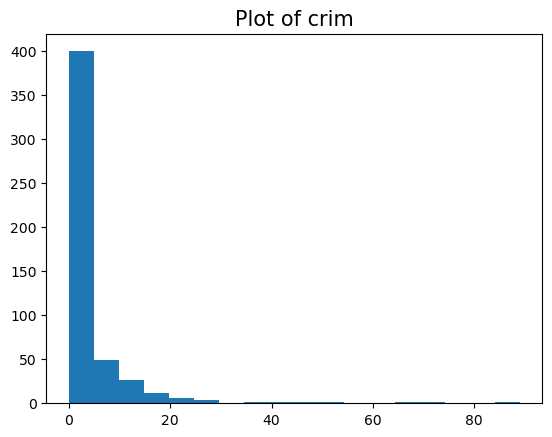

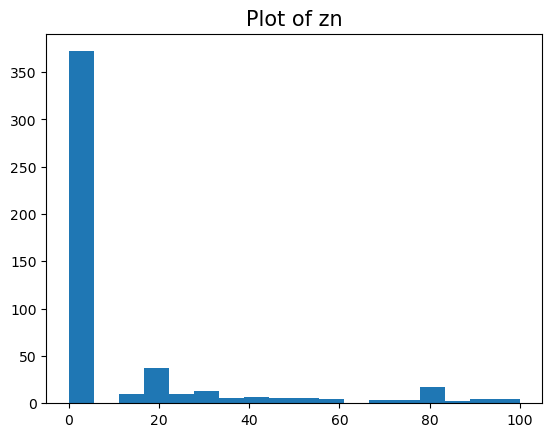

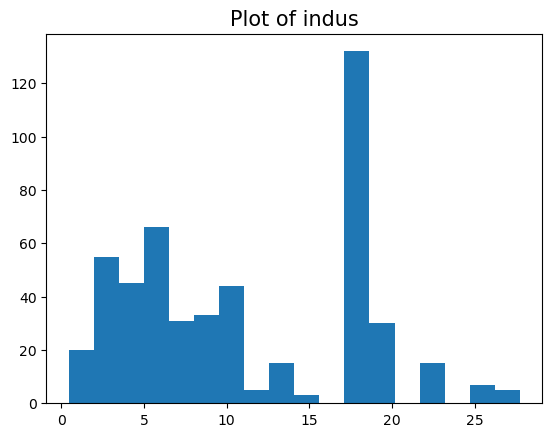

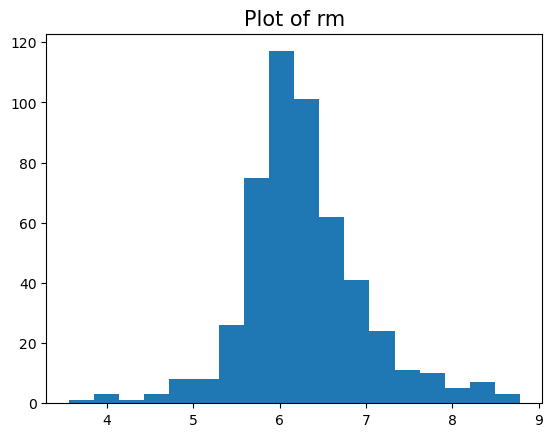

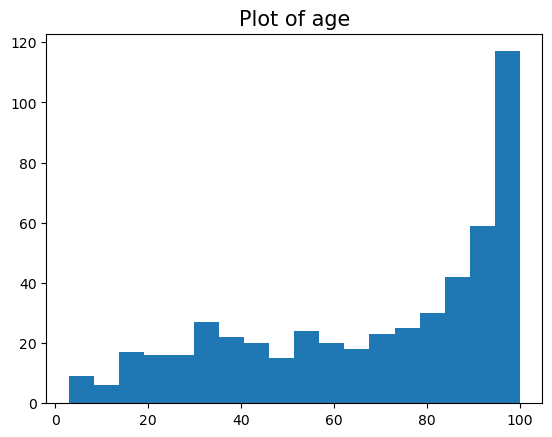

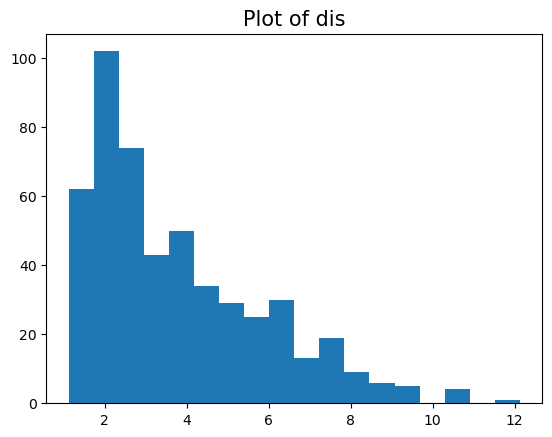

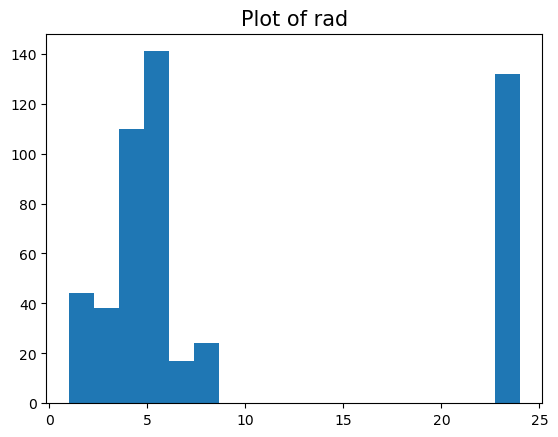

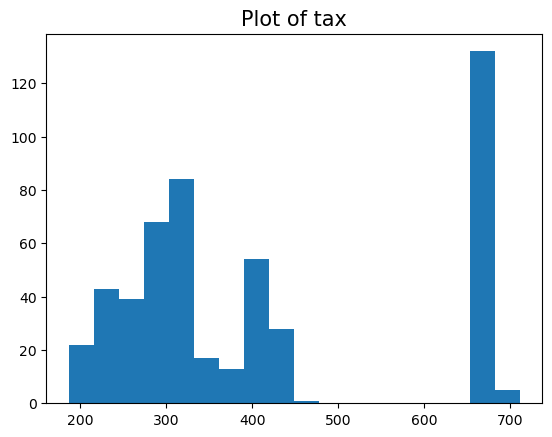

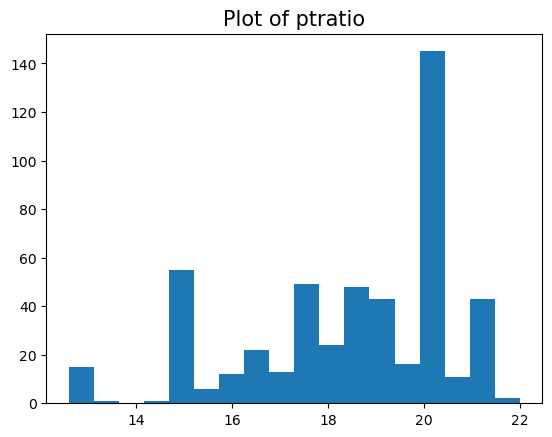

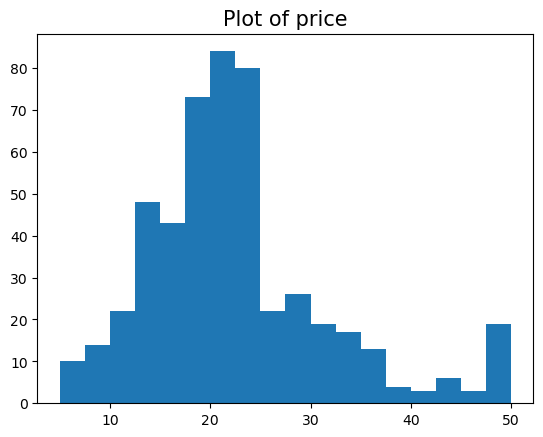

In [27]:
''' 6/7. Plot the histograms of all the variables (columns) in the new DataFrame, 
    Plot them all at once using a for loop. Try to add a unique title to a plot.
'''
for c in df_sub.columns:
    plt.title("Plot of "+c,fontsize=15)
    plt.hist(df_sub[c],bins=18)
    plt.show()

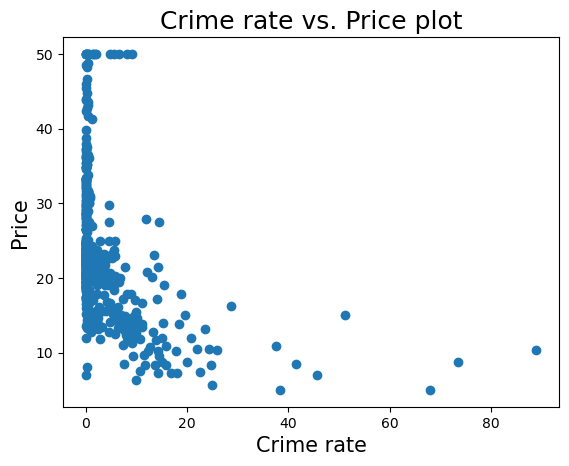

In [29]:
# 8. Create a scatter plot of crime rate versus price.
plt.scatter(df_sub['crim'],df_sub['price'])
plt.title("Crime rate vs. Price plot", fontsize=18)
plt.xlabel("Crime rate",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

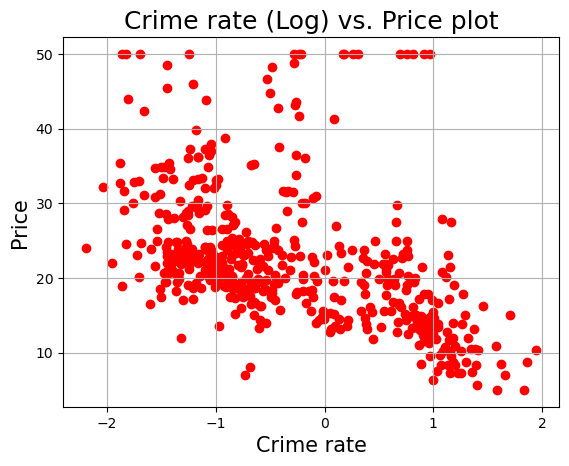

In [32]:
# 9. Plot using log10(crime) versus price.
plt.scatter(np.log10(df_sub['crim']),df_sub['price'], color='red')
plt.title("Crime rate (Log) vs. Price plot", fontsize=18)
plt.xlabel("Crime rate",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.grid(True)
plt.show()

In [9]:
''' #10. Calculate some useful statistics, such as mean rooms per dwelling, median age, mean distances to 
         five Boston employment centers, and the percentage of houses with a low price (< $20,000).
'''

# first get a summary of variables 
df_sub.describe()

,crim,zn,indus,rm,age,dis,rad,tax,ptratio,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.601545,23.322453,6.860353,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.082045,0.000000,5.190000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.256510,0.000000,9.690000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.677083,12.500000,18.100000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


In [11]:
#10.1 calculate mean room per dwelling
print('mean_room per dweling is:', df_sub['rm'].mean())

mean_room per dweling is: 6.284634387351779


In [13]:
# 10.2 calculate median Age
print('median age is:', df_sub['age'].median())

median age is: 77.5


In [15]:
# 10.3 calculate average (mean) distances to five Boston employment centres
print('avg distance is:', df_sub['dis'].mean())

avg distance is: 3.795042687747036


In [24]:
#10.4 calculate the percentage of houses with low price (< $20,000)
lp_house = df_sub['price'] <20
#lp_house.head()
print('low price house percentage is:', round(lp_house.mean()*100, 2), '%')

low price house percentage is: 41.5 %


##### Activity 6: Working with the Adult Income Dataset (UCI)

In [4]:
#6.1 Load the necessary libraries.
# the packages been loaded at the beginning of the notebook already

#6.2 one option is to read the csv from url, here I had download it into local directory
#url = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Wrangling-with-Python/master/Lesson04/Activity06/adult_income_data.csv'

# data = pd.read_csv(url)
# data.info()
# data.to_csv('output.csv')
    
df_income = pd.read_csv('adult_income_data.csv')   
df_income.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [3]:
#6.3 Create a script that will read a text file line by line.
header =[]
try:
    with open('adult_income_names.txt', 'r') as handler:
        for line in handler:
            handler.readline()
            var=line.split(":")[0]
            #print(var)
            header.append(var)
except FileNotFoundError:
    print('no file found')    
    
print(header)    

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [5]:
#6.4: Add a name of Income for the response variable to the dataset
header.append('Income')
#print(header)
df_new = pd.read_csv("adult_income_data.csv",names=header)

In [6]:
df_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [75]:
#6.5 Find the missing values
df_new.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [7]:
#6.6 Create a DataFrame with only age, education, and occupation
df_short = df_new[['age','education','occupation']]
df_short.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


<Axes: >

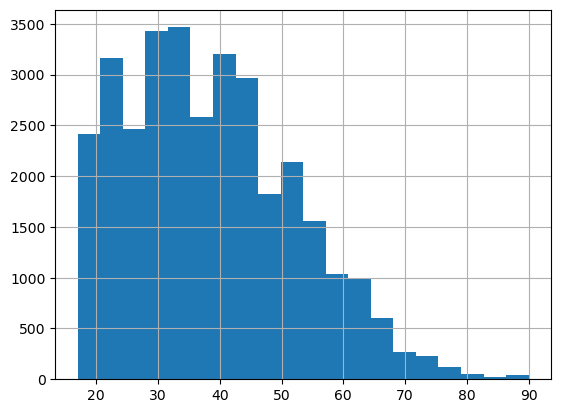

In [78]:
#6.7 Plot a histogram of age with a bin size of 20
df_short['age'].hist(bins=20)

In [79]:
#6.8 Create a function to strip the whitespace characters
def strip_whitespace(s):
    return s.strip()

In [87]:
''' 6.9 Use the apply method to apply this function to all the columns with string values, 
        create a new column, 
        copy the values from this new column to the old column, 
        and drop the new column.
'''
df_short['occupation_stripped']=df_short['occupation'].apply(strip_whitespace)
#df_short['occupation']=df_short['occupation_stripped']
#df_short.drop(labels=['occupation_stripped'],axis=1,inplace=True)

df_short['education_stripped']=df_short['education'].apply(strip_whitespace)
df_short['education']=df_short['education_stripped']
df_short.drop(labels=['education_stripped'],axis=1,inplace=True)

C:\Users\Daisy\AppData\Local\Temp\ipykernel_20000\2272481629.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['occupation_stripped']=df_short['occupation'].apply(strip_whitespace)
C:\Users\Daisy\AppData\Local\Temp\ipykernel_20000\2272481629.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short['education_stripped']=df_short['education'].apply(strip_whitespace)
C:\Users\Daisy\AppData\Local\Temp\ipykernel_20000\2272481629.py:11: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [95]:
#6.10 Find the number of people who are aged between 30 and 50
df_middleage = df_short[(df_short['age']>=30) & (df_short['age']<=50)]
df_middleage.head(20)

,age,education,occupation,occupation_stripped
0,39,Bachelors,Adm-clerical,Adm-clerical
1,50,Bachelors,Exec-managerial,Exec-managerial
2,38,HS-grad,Handlers-cleaners,Handlers-cleaners
5,37,Masters,Exec-managerial,Exec-managerial
6,49,9th,Other-service,Other-service
8,31,Masters,Prof-specialty,Prof-specialty
9,42,Bachelors,Exec-managerial,Exec-managerial
10,37,Some-college,Exec-managerial,Exec-managerial
11,30,Bachelors,Prof-specialty,Prof-specialty
13,32,Assoc-acdm,Sales,Sales


In [96]:
#6.11 Group the records based on age and education to find how the mean age is distributed
df_middleage.groupby(['education']).mean()

C:\Users\Daisy\AppData\Local\Temp\ipykernel_20000\48776122.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_middleage.groupby(['education']).mean()


,age
education,
10th,39.055921
11th,38.777188
12th,38.362319
1st-4th,39.384615
5th-6th,40.422222
7th-8th,40.617021
9th,38.894737
Assoc-acdm,38.825816
Assoc-voc,38.803851


In [99]:
#6.12 Group by occupation and show the summary statistics of age.
df_middleage.groupby(['occupation']).describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,375.0,38.538667,6.198842,30.0,33.00,37.0,43.50,50.0
Adm-clerical,1788.0,39.206376,5.920233,30.0,34.00,39.0,44.00,50.0
Armed-Forces,4.0,37.250000,6.898067,30.0,33.00,36.5,40.75,46.0
Craft-repair,2429.0,39.044874,5.895650,30.0,34.00,38.0,44.00,50.0
Exec-managerial,2479.0,40.091166,5.759625,30.0,35.00,40.0,45.00,50.0
Farming-fishing,455.0,39.294505,5.546070,30.0,35.00,39.0,43.00,50.0
Handlers-cleaners,533.0,38.045028,5.939374,30.0,33.00,37.0,43.00,50.0
Machine-op-inspct,1090.0,39.240367,5.936225,30.0,34.00,39.0,44.00,50.0
Other-service,1305.0,38.627586,5.907714,30.0,34.00,38.0,44.00,50.0


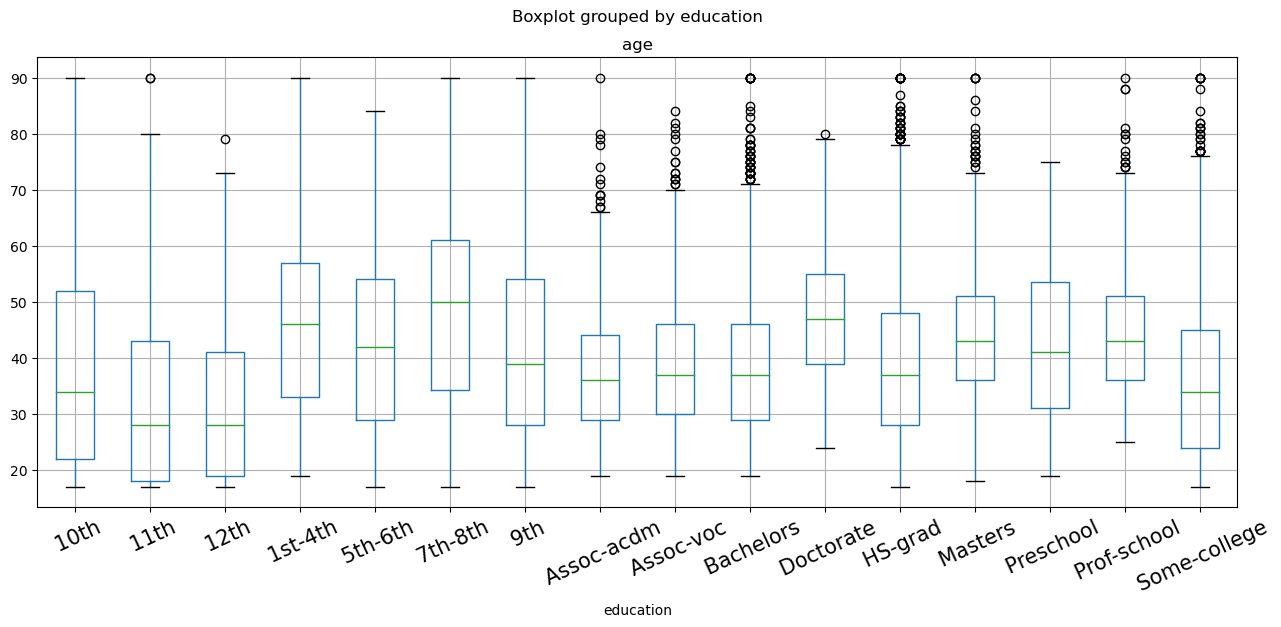

In [8]:
#6.13 Use subset and groupby to find outliers.
'''
the df_short is a subset created above with 3 column 'age','education','occupation'
now group by education
'''
df_short.boxplot(column='age',by='education',figsize=(15,6))
plt.xticks(fontsize=15)
plt.xlabel("education",fontsize=10)
plt.xticks(rotation = 25)
plt.show()

##### from chart above, looks like in most education level, age above 70 are above 4th quarttile, aka: outliner

In [30]:
# filter any outliner(age over 70)

outliner = df_short[(df_short['age'] >= 70)]
outliner.head(10)


,age,education,occupation
74,79,Some-college,Prof-specialty
100,76,Masters,Exec-managerial
144,70,Some-college,Tech-support
157,71,Some-college,Sales
222,90,HS-grad,Other-service
228,75,Assoc-voc,Adm-clerical
316,77,Some-college,Sales
324,76,Masters,Craft-repair
430,80,HS-grad,?
499,72,HS-grad,?


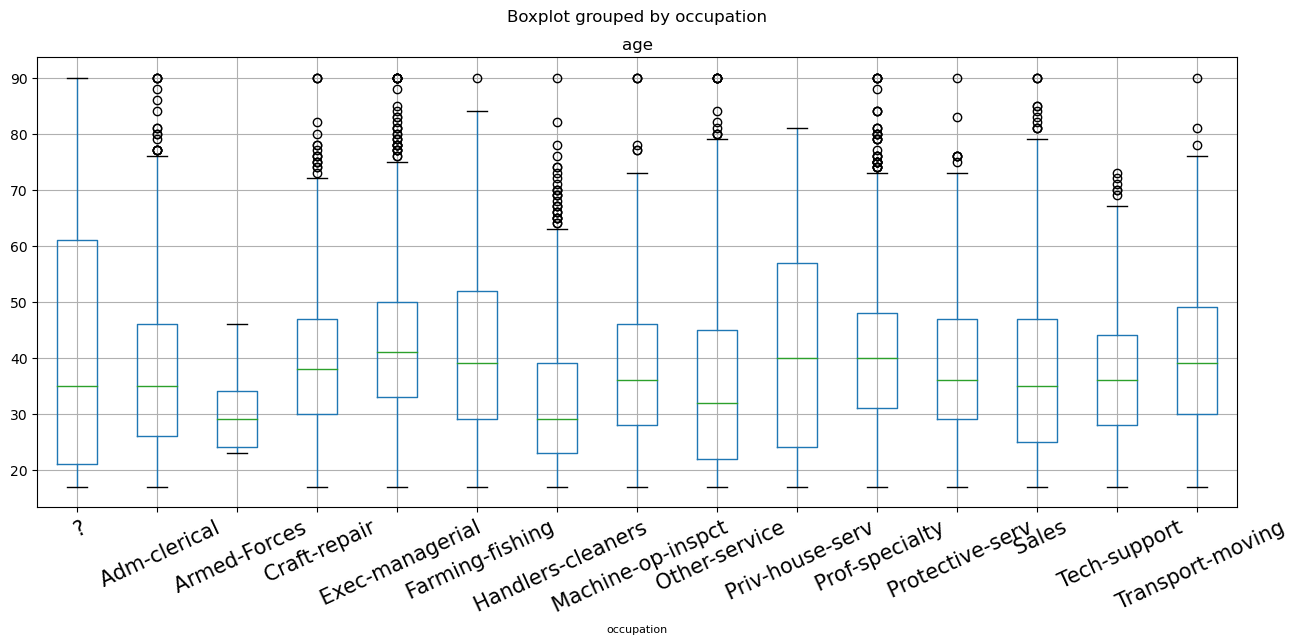

In [106]:
''' now group by occupation and plot the box chart again'''
df_short.boxplot(column='age',by='occupation',figsize=(15,6))
plt.xticks(fontsize=15)
plt.xlabel("occupation",fontsize=8)
plt.xticks(rotation = 25)
plt.show()

##### from chart above, looks like for most occupation, age above 62 are above 4th quarttile, aka: outliner

In [29]:
# filter the extreme outliner(age is or over 90)
outliner2 = df_short[(df_short['age'] >= 90)]
print (f"There are {len(outliner2. index)} workers are abnormally old for their occupation" )
#outliner.shape

There are 43 workers are abnormally old for their occupation


### Activity: Create a series and practice basic arithmetic steps

In [7]:
''' a. Series 1 = 7.3, -2.5, 3.4, 1.5
        i. Index = ‘a’, ‘c’, ‘d’, ‘e’
    b. Series 2 = -2.1, 3.6, -1.5, 4, 3.1
        i. Index = ‘a’, ‘c’, ‘e’, ‘f’, ‘g’
'''
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
print(s1)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64


In [8]:
# Add Series 1 and Series 2 together and print the results
#print(s1+s2)
(s1 + s2).fillna(s1 + 0).fillna(s2+0)

a    5.2
c    1.1
d    3.4
e    0.0
f    4.0
g    3.1
dtype: float64

In [9]:
#Subtract Series 1 from Series 2 and print the results
print(s2-s1)
(s2-s1).fillna(s1 + 0).fillna(s2+0)

a   -9.4
c    6.1
d    NaN
e   -3.0
f    NaN
g    NaN
dtype: float64


a   -9.4
c    6.1
d    3.4
e   -3.0
f    4.0
g    3.1
dtype: float64